<a href="https://colab.research.google.com/github/ZawWin58/firstproject/blob/master/%D1%80%D0%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install pandasql
from pandasql import sqldf
import pandas as pd

  Created wheel for pandasql: filename=pandasql-0.7.3-cp36-none-any.whl size=26819 sha256=e8ff13680c7b885c8f7cad2ead25995fa5a0ef44a447fbf72df4adb43157e2b3
  Stored in directory: /root/.cache/pip/wheels/53/6c/18/b87a2e5fa8a82e9c026311de56210b8d1c01846e18a9607fc9
Successfully built pandasql


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [0]:
data = pd.read_csv("adult.data.csv")

In [0]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [0]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
data.shape

(32561, 15)

In [0]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [0]:
d = data[["age", "sex", "fnlwgt"]]
d = d.dropna(axis=0, how="any")

In [0]:
d.head()

,age,sex,fnlwgt
0,39,Male,77516
1,50,Male,83311
2,38,Male,215646
3,53,Male,234721
4,28,Female,338409


In [0]:
d.shape

(32561, 3)

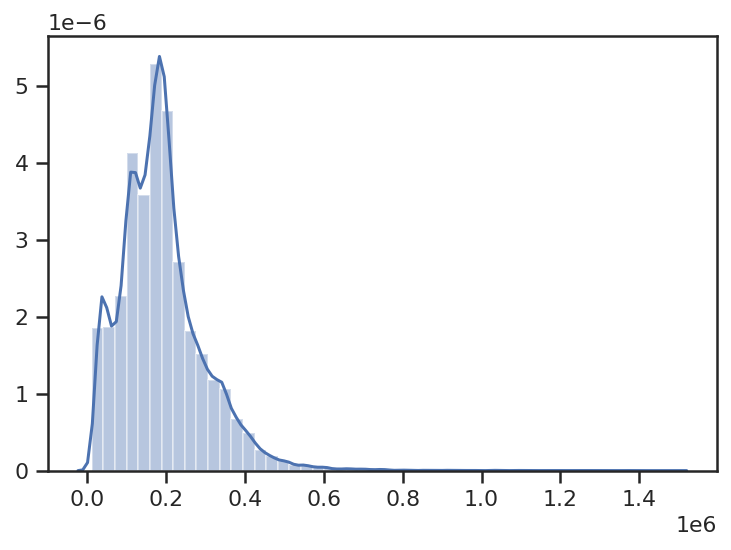

In [0]:
sns.distplot(d[["fnlwgt"]]);

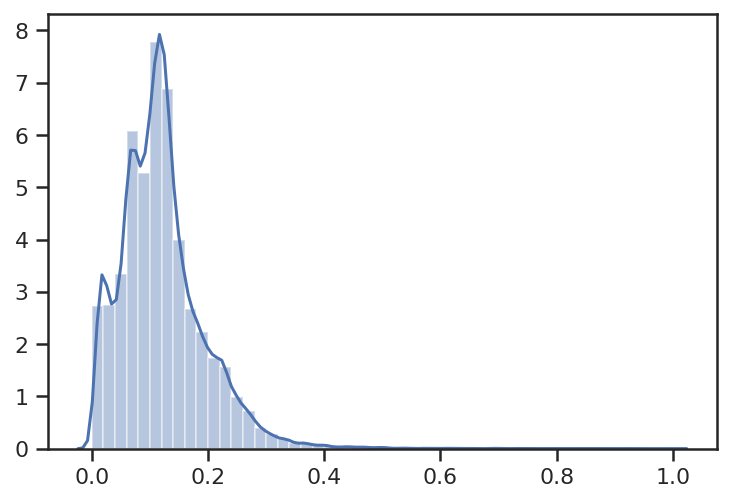

In [0]:
         from sklearn.preprocessing import MinMaxScaler
         sc = MinMaxScaler()
         sc_data = sc.fit_transform(d[["fnlwgt"]])
         sns.distplot(sc_data)


In [0]:
d["fnlwgt_SCALED"] = sc_data

In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [0]:
le = LabelEncoder()
sex_le = le.fit_transform(d["sex"])

In [0]:
np.unique(sex_le)

array([0, 1])

In [0]:
le.inverse_transform(np.unique(sex_le))

array(['Female', 'Male'], dtype=object)

In [0]:
d["sex_INDEX"] = sex_le

In [0]:
ohe = OneHotEncoder()
sex_ohe = ohe.fit_transform(d[["sex"]])

In [0]:
sex_ohe.todense()[0:10]

matrix([[0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.]])

In [0]:
d["sex"].head(10)

0      Male
1      Male
2      Male
3      Male
4    Female
5    Female
6    Female
7      Male
8    Female
9      Male
Name: sex, dtype: object

In [0]:
ohe_names = ohe.get_feature_names()
ohe_names

array(['x0_Female', 'x0_Male'], dtype=object)

In [0]:
for idx, name in enumerate(ohe_names):
  d[name] = sex_ohe[:, idx].todense()

In [0]:
d.head(10)

,age,sex,fnlwgt,fnlwgt_SCALED,sex_INDEX,x0_Female,x0_Male
0,39,Male,77516,0.044302,1,0.0,1.0
1,50,Male,83311,0.048238,1,0.0,1.0
2,38,Male,215646,0.138113,1,0.0,1.0
3,53,Male,234721,0.151068,1,0.0,1.0
4,28,Female,338409,0.221488,0,1.0,0.0
5,37,Female,284582,0.184932,0,1.0,0.0
6,49,Female,160187,0.100448,0,1.0,0.0
7,52,Male,209642,0.134036,1,0.0,1.0
8,31,Female,45781,0.022749,0,1.0,0.0
9,42,Male,159449,0.099947,1,0.0,1.0
